In [18]:
#Imported applicable panda libraries
import pandas as pd
from pathlib import Path
import hvplot.pandas
import numpy as np
import requests
import requests_html
import ftplib
import io
from yahoo_fin.stock_info import get_data
import yahoo_fin.stock_info as si
from IPython.display import display_html
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [19]:
#Created a for loop to get historical data for listed price in ticker_list utilzing get_data function from yahoo_fin.stock_info API
s1= "jpm"
s2= "ms"
s3 = "schw"
s4 = "wfc"
s5= "bac"

ticker_list = [s1,s2,s3,s4,s5]
historical_data = {}
for ticker in ticker_list:
    historical_data[ticker] = get_data(ticker)


In [20]:
#created variables to parse historical close prices for individuals stocks
ticker_1 = historical_data[s1]["close"]
ticker_2 = historical_data[s2]["close"]
ticker_3 = historical_data[s3]["close"]
ticker_4 = historical_data[s4]["close"]
ticker_5 = historical_data[s5]["close"]


In [21]:
#created finance_stocks_close_df that concatenated the individual stocks closing prices into one data frame
finance_stocks_close_df = pd.concat([ticker_1,ticker_2,ticker_3,ticker_4,ticker_5],axis=1,keys=[s1,s2,s3,s4,s5])
display(finance_stocks_close_df.head())
display(finance_stocks_close_df.tail())

,jpm,ms,schw,wfc,bac
1972-06-01,NaN,NaN,NaN,0.880208,NaN
1972-06-02,NaN,NaN,NaN,0.882813,NaN
1972-06-05,NaN,NaN,NaN,0.895833,NaN
1972-06-06,NaN,NaN,NaN,0.895833,NaN
1972-06-07,NaN,NaN,NaN,0.888021,NaN


,jpm,ms,schw,wfc,bac
2022-04-29,119.360001,80.589996,66.330002,43.630001,35.680000
2022-05-02,120.449997,81.959999,67.889999,43.669998,36.139999
2022-05-03,123.029999,83.750000,69.459999,44.160000,37.130001
2022-05-04,127.099998,87.220001,71.360001,45.980000,38.619999
2022-05-05,123.919998,84.940002,69.849998,44.759998,37.540001


In [22]:
#Code used to confirm start dates of the finance_stocks_close_df above
historical_data[s2].head(2)

,open,high,low,close,adjclose,volume,ticker
1993-02-23,8.000,8.1250,7.65625,7.75000,3.907936,40594800,MS
1993-02-24,7.875,8.0625,7.78125,7.96875,4.018242,9426400,MS


In [23]:
#describe() function used to get the statistial summary for the the listed stock tickers
finance_stocks_close_df.describe()

,jpm,ms,schw,wfc,bac
count,10626.000000,7355.000000,8726.000000,12592.000000,12412.000000
mean,40.440162,40.848913,18.878312,18.488832,17.464053
std,35.005245,22.201145,17.986533,18.222934,14.553011
min,3.375000,7.750000,0.128944,0.489583,0.828125
25%,12.500000,24.610001,3.648148,1.312500,4.812500
50%,35.602083,39.860001,14.890000,12.687500,13.163125
75%,50.416668,52.950001,27.772501,30.671250,29.070000
max,171.779999,109.375000,95.529999,65.930000,54.900002


In [24]:
#daily_returns_finance_stocks variable created to computes daily returns for each individual ticker 
daily_returns_finance_stocks = finance_stocks_close_df.pct_change().dropna()
daily_returns_finance_stocks.head()

,jpm,ms,schw,wfc,bac
1993-02-24,0.027607,0.028226,0.038961,0.019231,0.018349
1993-02-25,-0.005970,0.023529,0.066667,0.008086,-0.013514
1993-02-26,-0.027027,0.015326,0.011719,-0.005348,-0.022831
1993-03-01,0.012346,-0.033962,-0.023167,0.010753,0.004673
1993-03-02,0.021341,0.027344,0.035573,0.015957,0.018605


In [25]:
#finance_cum_ret variable created that computes the cumulative returns for each individual ticker and used to plot returns for comparison.
finance_cum_ret = (1 + daily_returns_finance_stocks).cumprod() -1
display(finance_cum_ret.hvplot(legend=True,figsize=(10,7),title="Cumulative Returns",xlabel="Year",ylabel="Returns"))

:NdOverlay   [Variable]
   :Curve   [index]   (value)

:Bars   [index]   (0)

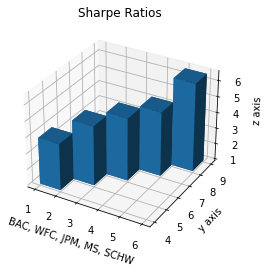

None

In [27]:
# variables created for annualized standard deviation and annualized returns for the individual tickers utilizing 252 trading days to compute and plot the Sharpe Ratios (Return/Risk ratio)
trading_year = 252
annualized_std = daily_returns_finance_stocks.std() * np.sqrt(trading_year)
annualized_returns = daily_returns_finance_stocks.mean() * trading_year
sharpe = annualized_returns/annualized_std
#created a 3d plot to display the Sharpe Ratio is ascending order for tickers
fig = plt.figure()
ax1 =fig.add_subplot(111,projection="3d")
x3 = [1,2,3,4,5]
y3 = [4,5,6,7,8]
z3 = np.ones(5)

dx = np.ones(5)
dy = np.ones(5)
dz = [2.9,3.7,3.9,4,5.5]

ax1.bar3d(x3,y3,z3,dx,dy,dz)

ax1.set_xlabel("BAC, WFC, JPM, MS, SCHW")
ax1.set_ylabel("y axis")
ax1.set_zlabel("z axis")
ax1.set_title("Sharpe Ratios")



display(sharpe.hvplot(kind="bar",figsize=(10,7),title="Sharpe Ratios")) 
display(plt.show())

In [106]:
#Analyst to recommend 2 tickers to provide to user from selected industry sector based on Sharpe Ratio and cumulative returns comparison above.
#Utilizing the get_stats_valuation function from the yahoo_fin.stock_info library to get selected tickers current valuation stats. This section is used to compare selected tickers
#trailing P/E and Forward P/E ratios for ticker recommendation (Fundamental Analysis).
stock_1 = s3
stock_2 = s2

stock_selection1 = si.get_stats_valuation(stock_1).style.set_table_attributes("style='display:inline'").set_caption(stock_1)
stock_selection2 = si.get_stats_valuation(stock_2).style.set_table_attributes("style='display:inline'").set_caption(stock_2)

display_html(stock_selection1._repr_html_()+stock_selection2._repr_html_(), raw=True)

,Unnamed: 0,As of Date: 4/29/2022Current,3/31/2022,12/31/2021,9/30/2021,6/30/2021,3/31/2021
0,Market Cap (intraday),125.72B,159.79B,159.22B,137.59B,137.45B,122.88B
1,Enterprise Value,nan,nan,nan,nan,nan,nan
2,Trailing P/E,23.95,29.79,31.86,30.73,32.07,30.75
3,Forward P/E,17.15,22.52,24.21,21.37,23.31,24.39
4,PEG Ratio (5 yr expected),0.81,1.03,1.18,1.04,1.82,33.44
5,Price/Sales (ttm),6.82,8.64,8.82,7.97,8.37,8.00
6,Price/Book (mrq),2.71,3.45,3.35,2.90,3.05,2.54
7,Enterprise Value/Revenue,nan,nan,nan,nan,nan,nan
8,Enterprise Value/EBITDA,nan,nan,nan,nan,nan,nan
,Unnamed: 0,As of Date: 5/3/2022Current,3/31/2022,12/31/2021,9/30/2021,6/30/2021,3/31/2021


In [107]:
#Listing 52 week high/low of ticker to current ticker price (technical analysis) for determining breakouts opportunites for ticker and support and resistance areas for purchase or sells.
input= stock_1
ticker_52_wk_high_low = si.get_stats(input)[3:5]
display(input)
display(ticker_52_wk_high_low)
print(f"Most recent price for: {si.get_live_price(input): .02f}")

'schw'

,Attribute,Value
3,52 Week High 3,96.24
4,52 Week Low 3,65.73


Most recent price for:  69.85


In [108]:
#Utilizing the get_stats function from the yahoo_fin.stock_info library to get selected tickers current financial stats. This section is used to compare selected tickers
# financial stats (Fundamental Analysis).


stock_selection1 = si.get_stats(stock_1).style.set_table_attributes("style='display:inline'").set_caption(stock_1)
stock_selection2 = si.get_stats(stock_2).style.set_table_attributes("style='display:inline'").set_caption(stock_2)

display_html(stock_selection1._repr_html_()+stock_selection2._repr_html_(), raw=True)

,Attribute,Value
0,Beta (5Y Monthly),1.00
1,52-Week Change 3,-0.22%
2,S&P500 52-Week Change 3,2.35%
3,52 Week High 3,96.24
4,52 Week Low 3,65.73
5,50-Day Moving Average 3,80.65
6,200-Day Moving Average 3,80.15
7,Avg Vol (3 month) 3,8.64M
8,Avg Vol (10 day) 3,9.47M
9,Shares Outstanding 5,1.82B
